<a href="https://colab.research.google.com/github/prasa12/MyPython-Stuff/blob/master/Pytorch/01_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Lets explore Pytorch end to end workflow

In [124]:
what_were_covering = {1:"data(prepare and load)",
                      2: "Build Model",
                      3: "Making predictions and evaluating a model(inference)",
                      4: "Save and loading the Model",
                      5: "Putting all together"}

what_were_covering

{1: 'data(prepare and load)',
 2: 'Build Model',
 3: 'Making predictions and evaluating a model(inference)',
 4: 'Save and loading the Model',
 5: 'Putting all together'}

In [125]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check Pytorch versio
torch.__version__

'2.8.0+cu126'

from typing import Text
## 1. Data (preparing and loading)

Data can be almost anything in machine learning

* Excel Spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

Machine is a game of 2 parts
1. Get data into numerical representation
2. Build a model to learn patterns in the Numerical representation

We will use a linear regression formula to make a straight line with known **parameters**

In [126]:
# Create Known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [127]:
len(X),len(y)

(50, 50)

In [128]:
## Splitting the data into training and testing sets

# Create a train/test split
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [129]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data,test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    #Plot predictions if they exist
    plt.scatter(test_data, predictions.detach().numpy(), c="r", s=4, label = "Predictions") # Detach and convert to numpy

  plt.legend(prop={"size": 14});

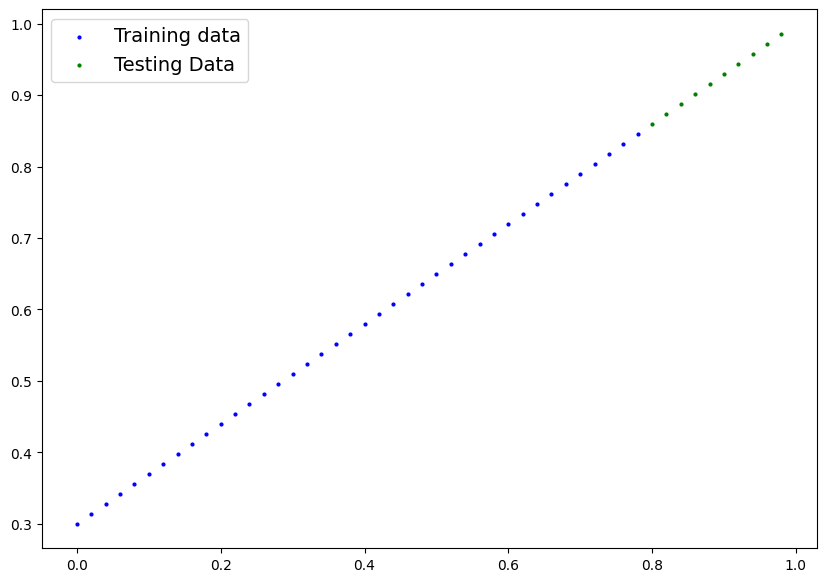

In [130]:
plot_predictions()

## 2. Build a model
# Linear Regression model

In [131]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))

    # Forward method to define the computation in the model
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias

### Pytorch Model Building essentials
## torch.nn - contains all the buildings for the computational graphs (a neural network can be considered a computational graph)
## torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
## torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
## torch.optim - This is where the optimizers in the Pytorch live, they will help with gradient descent
## def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation



In [132]:
### Checking the contents of the Pytorch model
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [133]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [134]:
weight, bias

(0.7, 0.3)

## Making predictions using 'torch.inference_mode()

To check out model's predictive power, let's see how well it predicts

In [135]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [136]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [137]:
# inference_mode is preferred
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [138]:
y_test


tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

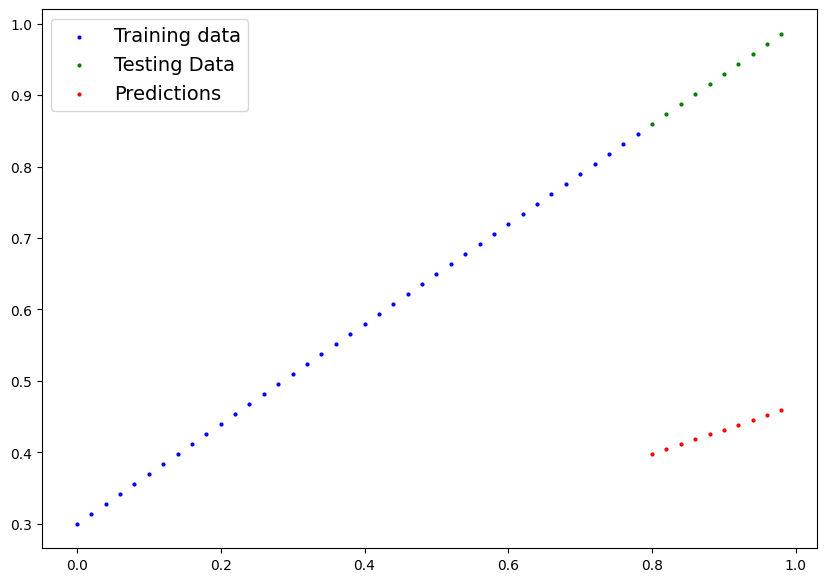

In [139]:
plot_predictions(predictions=y_preds)

In [140]:
## 3. Train Model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [141]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [142]:
# Set up a loss function and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

### Building a traing loop in Pytorch
Things we need in training loop
0. Loop through Data
1. Forward pass
2. Calculate the Loss
3. optimizer
4. Loss Backward - moves backwards through the network and calculates the gradients
5. Optimizer step - use the optimizer parameters to optimize the step

In [143]:
# An epoch is one loop through the data ...
epochs = 1000

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  # Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # Optimizer
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step
  optimizer.step()

    # Evaluate the model on the test set
  model_0.eval() # Set the model to evaluation mode
  with torch.inference_mode():
    # Make predictions on the test data
    test_preds = model_0(X_test)

    # Calculate the loss on the test predictions
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())

  print(f"Test loss: {test_loss.item():.4f}")

list(model_0.parameters())


Test loss: 0.4811
Test loss: 0.4676
Test loss: 0.4541
Test loss: 0.4407
Test loss: 0.4272
Test loss: 0.4137
Test loss: 0.4002
Test loss: 0.3868
Test loss: 0.3733
Test loss: 0.3598
Test loss: 0.3464
Test loss: 0.3329
Test loss: 0.3194
Test loss: 0.3059
Test loss: 0.2925
Test loss: 0.2790
Test loss: 0.2655
Test loss: 0.2521
Test loss: 0.2396
Test loss: 0.2282
Test loss: 0.2173
Test loss: 0.2070
Test loss: 0.1977
Test loss: 0.1891
Test loss: 0.1810
Test loss: 0.1735
Test loss: 0.1667
Test loss: 0.1604
Test loss: 0.1547
Test loss: 0.1497
Test loss: 0.1446
Test loss: 0.1402
Test loss: 0.1365
Test loss: 0.1327
Test loss: 0.1290
Test loss: 0.1258
Test loss: 0.1227
Test loss: 0.1203
Test loss: 0.1178
Test loss: 0.1154
Test loss: 0.1136
Test loss: 0.1118
Test loss: 0.1100
Test loss: 0.1083
Test loss: 0.1065
Test loss: 0.1047
Test loss: 0.1036
Test loss: 0.1025
Test loss: 0.1014
Test loss: 0.1003
Test loss: 0.0992
Test loss: 0.0981
Test loss: 0.0970
Test loss: 0.0959
Test loss: 0.0948
Test loss:

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [144]:
y_pred
loss, test_loss

(tensor(0.0026, grad_fn=<MeanBackward0>), tensor(0.0084))

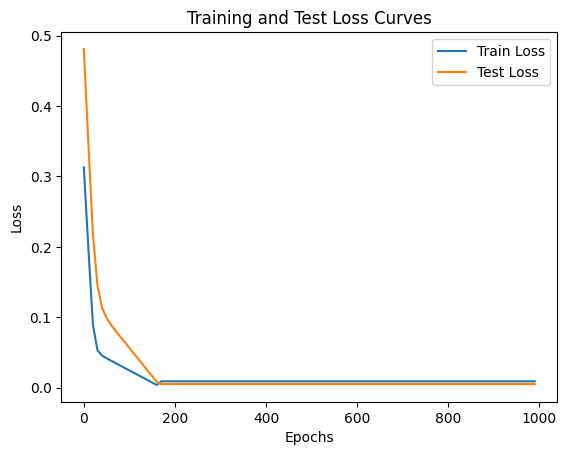

In [147]:
# Plot the loss curve
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()) ,label = "Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

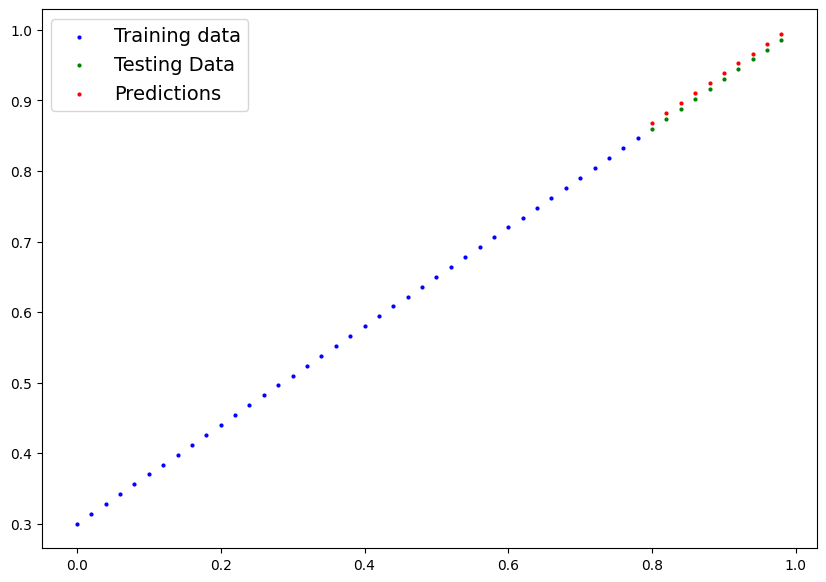

In [146]:
plot_predictions(predictions=test_preds)